# Forward propagation XOR con diferentes compuertas

Statistical Learning II

Rodrigo Chang

19000625

<img src="network.png" title="Diagrama de la red neuronal">

## Librería y funciones de activación y bias

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Activación sigmoide
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Activación de escalón
def heaviside(x):
    return (x >= 0).astype(np.float)

# Función para añadir el término de bias
# x tiene shape (n, 1)
def addBias(x):
    return np.vstack((x, np.ones(x.shape[1])))

## Desarrollo de prueba

In [5]:
x = np.array([1, 0]).reshape(-1, 1)
x

array([[1],
       [0]])

In [4]:
# Matriz de pesos de la primera capa
W_1 = np.array([[20., 20., -10.], [-20., -20., 30.]])
W_1

array([[ 20.,  20., -10.],
       [-20., -20.,  30.]])

In [6]:
# Productos punto en las neuronas
z_1 = np.matmul(W_1, addBias(x))
z_1

array([[10.],
       [10.]])

In [9]:
# Activación en las neuronas
h_1 = heaviside(z_1)
h_1

array([[1.],
       [1.]])

In [10]:
# Matriz de pesos de la capa de salida
W_2 = np.array([[20, 20, -30]])

In [11]:
z_2 = np.matmul(W_2, addBias(h_1))
z_2

array([[10.]])

In [13]:
h_2 = heaviside(z_2)
h_2

array([[1.]])

## Función vectorizada para efectuar el *forward propagation*

In [50]:
# Función para evaluar la red neuronal que implementa XOR
# x tiene shape (2, n)
def forwardPropXOR(x, activation=heaviside, retHidden=False):
    # Matriz de pesos de la primera capa y capa de salida
    W_1 = np.array([[20., 20., -10.], [-20., -20., 30.]])
    W_2 = np.array([[20, 20, -30]])
    # Productos punto en las neuronas de la capa oculta
    z_1 = np.matmul(W_1, addBias(x))
    h_1 = activation(z_1)
    # Capa de salida
    z_2 = np.matmul(W_2, addBias(h_1))
    y = activation(z_2)
    
    if retHidden:
        return y, h_1
    return y

In [51]:
# Obteniendo un conjunto de valores de entrada para la compuerta XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
X = X.T
X, X.shape

(array([[0, 0, 1, 1],
        [0, 1, 0, 1]]), (2, 4))

In [97]:
# Evaluando la compuerta XOR con la activación heaviside
forwardPropXOR(X)

array([[0., 1., 1., 0.]])

In [53]:
# Evaluando la compuerta XOR con la activación heaviside
forwardPropXOR(X, activation=sigmoid)

array([[4.54391049e-05, 9.99954520e-01, 9.99954520e-01, 4.54391049e-05]])

## Gráfica de resultados de la capa oculta

In [58]:
# Para las 4 combinaciones en X, obtenemos resultados en la capa oculta
# Primera fila es h_1 del diagrama
# Segunda fila es h_2 del diagrama
_, h = forwardPropXOR(X, retHidden=True)
h

array([[0., 1., 1., 1.],
       [1., 1., 1., 0.]])

In [59]:
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [87]:
def graficarNeurona(x1, x2, y):
    f = np.abs(y-1) < 0.1
    nf = np.logical_not(f)

    plt.scatter(x1[f], x2[f], marker='*', label='1')
    plt.scatter(x1[nf], x2[nf], marker='o', label='0')
    plt.legend()

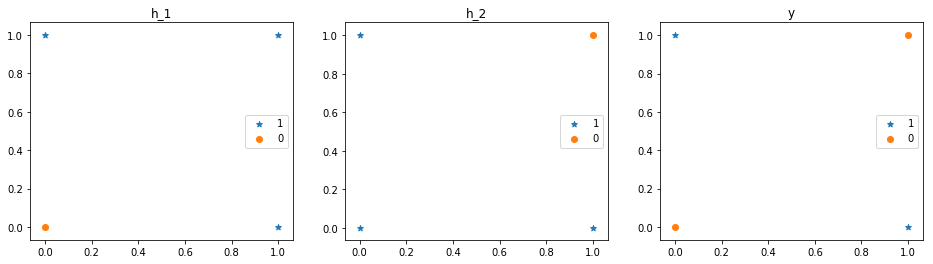

In [107]:
# Gráfica de las neuronas de la capa intermedia y salida
x1 = X[0, :]
x2 = X[1, :]

plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
graficarNeurona(x1, x2, h[0, :])
plt.title("h_1")
plt.subplot(1,3,2)
graficarNeurona(x1, x2, h[1, :])
plt.title("h_2")
plt.subplot(1,3,3)
graficarNeurona(x1, x2, forwardPropXOR(X).squeeze())
plt.title("y");

***
## Conclusiones
Como se observa de la salida obtenida de las neuronas en la capa intermedia, estas actúan como compuertas AND, permitiendo una activación positiva solo para una combinación en particular. La neurona de salida actúa como una compuerta OR, permitiendo que las dos combinaciones positivas de la capa oculta se manifiesten en la salida, conformando la función lógica XOR.